# 1.股票数据可视化
##  K线图

In [1]:
# 安装必要的库
"""
pip install mplfinance
pip install pyecharts
pip install statsmodels --upgrade -i https://pypi.douban.com/simple/
pip install seaborn==0.9.0 或 pip install seaborn --upgrade
"""

'\npip install mplfinance\npip install pyecharts\npip install statsmodels --upgrade -i https://pypi.douban.com/simple/\npip install seaborn==0.9.0 或 pip install seaborn --upgrade\n'

In [1]:
# 导入库
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt
import matplotlib as mpl       # 用于设置图形参数
from cycler import cycler      # 用于定制线条颜色
import seaborn as sns
import numpy as np

# 忽略警告
import warnings
warnings.filterwarnings('ignore')

mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

In [9]:
# 导入股票数据
sbux = pd.read_csv("688262国芯科技.csv", index_col=0,parse_dates=True, encoding="GBK")
sbux.head()

,股票代码,名称,收盘价,最高价,最低价,开盘价,前收盘,涨跌额,涨跌幅,换手率,成交量,成交金额,总市值,流通市值
日期,,,,,,,,,,,,,,
2022-09-16,'688262,国芯科技,55.18,56.19,52.59,53.00,53.09,2.09,3.9367,9.3774,5230935,288490710.0,1.324320e+10,3.078071e+09
2022-09-15,'688262,国芯科技,53.09,54.76,51.30,53.41,53.41,-0.32,-0.5991,5.5026,3069505,161387015.0,1.274160e+10,2.961485e+09
2022-09-14,'688262,国芯科技,53.41,53.90,51.00,51.02,52.04,1.37,2.6326,5.5851,3115499,164244658.0,1.281840e+10,2.979336e+09
2022-09-13,'688262,国芯科技,52.04,53.83,51.33,52.00,51.62,0.42,0.8136,4.3405,2421256,126843105.0,1.248960e+10,2.902914e+09
2022-09-09,'688262,国芯科技,51.62,53.60,50.82,53.35,53.40,-1.78,-3.3333,5.5925,3119654,160894252.0,1.238880e+10,2.879485e+09


In [10]:
'''绘制图形的类型，有candle, renko, ohlc, line等；K线图为candle
mav(moving average):均线类型,此处设置5,20,60日线
volume:布尔类型，设置是否显示成交量，默认False
title:设置标题   y_label:设置纵轴主标题
figratio:设置图形纵横比
figscale:设置图形尺寸(数值越大图像质量越高)'''
kwargs = dict(type='candle',mav=(5, 20, 60),volume=True,ylabel='Candles',figratio=(12, 9),figscale=4)


'''设置K线线柱颜色，up意为收盘价大于等于开盘价,down:与up相反，这样设置与国内K线颜色标准相符
edge:K线线柱边缘颜色(i代表继承自up和down的颜色)，下同。详见官方文档)
wick:灯芯(上下影线)颜色
volume:成交量直方图的颜色'''
mc = mpf.make_marketcolors(up='red',down='green',edge='i',wick='i',volume='in')

'''设置图形风格
gridaxis:设置网格线位置
gridstyle:设置网格线线型
y_on_right:设置y轴位置是否在右'''
s = mpf.make_mpf_style(gridaxis='both',gridstyle='-.',y_on_right=False,marketcolors=mc)

'''设置均线颜色，配色图
建议设置较深的颜色且与红色、绿色形成对比
此处设置七条均线的颜色，也可应用默认设置'''
mpl.rcParams['axes.prop_cycle'] = cycler(color=['dodgerblue', 'deeppink','navy', 'teal', 'maroon', 'darkorange', 'indigo'])

# # 设置线宽
mpl.rcParams['lines.linewidth'] = 1.5

# 图形绘制
# show_nontrading:是否显示非交易日，默认False
mpf.plot(sbux,**kwargs,style=s,show_nontrading=False,)
plt.show()

ValueError: Column "Open" NOT FOUND in Input DataFrame!
            CHECK that your column names are correct AND/OR
            CHECK for leading or trailing blanks in your column names.

## Pyechart风格K线图

In [5]:
# 简单图
import pyecharts.options as opts
from pyecharts.charts import Candlestick
sbux = pd.read_excel("SBUX.xlsx",index_col=0)
sbux.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,89.349998,88.050003,88.120003,89.349998,6473800,86.827850
2020-01-03,89.099998,88.099998,88.660004,88.830002,4874100,86.322525
2020-01-06,88.410004,87.470001,88.110001,88.129997,5409800,85.642288
2020-01-07,88.029999,87.129997,87.959999,87.860001,6514700,85.379913
2020-01-08,89.349998,87.779999,87.940002,88.879997,7296300,86.371109


In [6]:
# 数据准备
new_sbux = sbux.iloc[::20]
x_data = new_sbux.index.tolist()
y_data = new_sbux[["Open","Close","Low","High"]].values.tolist()

In [8]:
kline=(
    Candlestick(init_opts=opts.InitOpts(width="600px", height="400px"))
    .add_xaxis(xaxis_data=x_data)
    .add_yaxis(series_name="", y_axis=y_data)
    .set_series_opts()
    .set_global_opts(
        yaxis_opts=opts.AxisOpts(
            splitline_opts=opts.SplitLineOpts(
                is_show=True, linestyle_opts=opts.LineStyleOpts(width=1)
            )
        )
    )
    
)
kline.render_notebook()

In [9]:
#鼠标缩放
from pyecharts import options as opts
from pyecharts.charts import Kline
x1_data = sbux.index.tolist()
y1_data = sbux[["Open","Close","Low","High"]].values.tolist()

kline = (
    Kline()
    .add_xaxis(x1_data)
    .add_yaxis(
        "kline",
        y1_data,
        itemstyle_opts=opts.ItemStyleOpts(
            color="#ec0000",
            color0="#00da3c",
            border_color="#8A0000",
            border_color0="#008F28",
        ),
    )
    .set_global_opts(
        xaxis_opts=opts.AxisOpts(is_scale=True),
        yaxis_opts=opts.AxisOpts(
            is_scale=True,
            splitarea_opts=opts.SplitAreaOpts(
                is_show=True, areastyle_opts=opts.AreaStyleOpts(opacity=1)
            ),
        ),
        datazoom_opts=[opts.DataZoomOpts(type_="inside")],
        title_opts=opts.TitleOpts(title="Kline-ItemStyle"),
    )
)
kline.render_notebook()

In [10]:
#刻度标签
kline = (
    Kline()
    .add_xaxis(x1_data)
    .add_yaxis(
        "kline",
         y1_data,
        markline_opts=opts.MarkLineOpts(
            data=[opts.MarkLineItem(type_="max", value_dim="close")]
        ),
    )
    .set_global_opts(
        xaxis_opts=opts.AxisOpts(is_scale=True),
        yaxis_opts=opts.AxisOpts(
            is_scale=True,
            splitarea_opts=opts.SplitAreaOpts(
                is_show=True, areastyle_opts=opts.AreaStyleOpts(opacity=1)
            ),
        ),
        title_opts=opts.TitleOpts(title="K线图"),
    )
)
kline.render_notebook()

In [11]:
# 鼠标移动
kline = (
    Kline()
    .add_xaxis(x1_data)
    .add_yaxis("kline",y1_data)
    .set_global_opts(
        xaxis_opts=opts.AxisOpts(is_scale=True),
        yaxis_opts=opts.AxisOpts(
            is_scale=True,
            splitarea_opts=opts.SplitAreaOpts(
                is_show=True, areastyle_opts=opts.AreaStyleOpts(opacity=1)
            ),
        ),
        datazoom_opts=[opts.DataZoomOpts(pos_bottom="-2%")],
        title_opts=opts.TitleOpts(title="Kline-DataZoom-slider-Position"),
    )
)
kline.render_notebook()

## 其他图形

In [12]:
#抽取开盘，最高，最低，收盘数据（就是讲dataframe变得小一点）
new_sbux=sbux[["Open","Close","Low","High"]]
new_sbux.head()

,Open,Close,Low,High
Date,,,,
2020-01-02,88.120003,89.349998,88.050003,89.349998
2020-01-03,88.660004,88.830002,88.099998,89.099998
2020-01-06,88.110001,88.129997,87.470001,88.410004
2020-01-07,87.959999,87.860001,87.129997,88.029999
2020-01-08,87.940002,88.879997,87.779999,89.349998


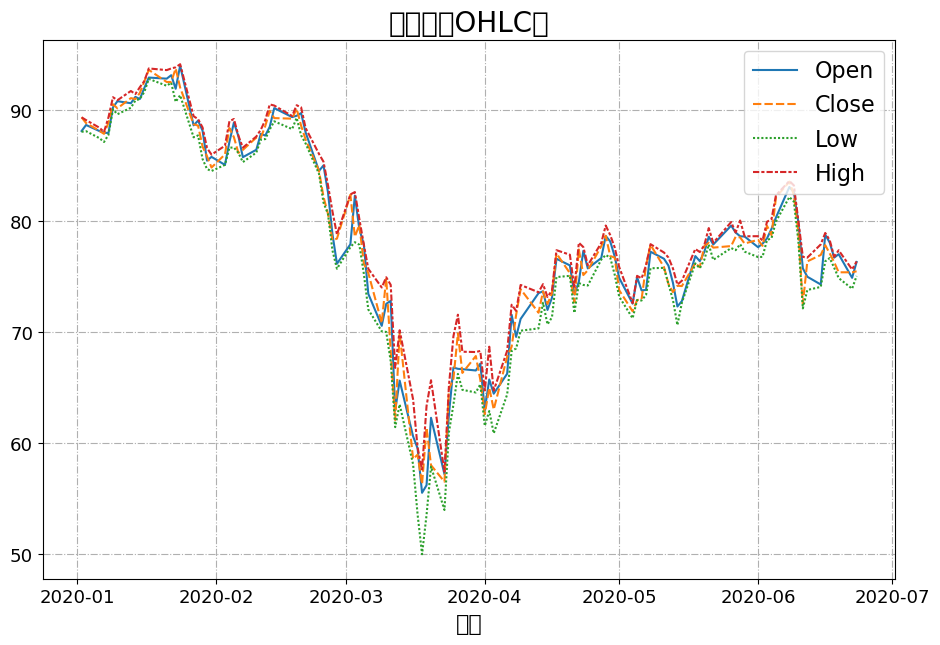

In [13]:
#绘制OHLC
plt.figure(figsize=(11,7))
plt.title('股票价格OHLC图',size=20)
sns.lineplot(data = new_sbux.iloc[:120])  #前120行数据

#给x轴加上标签
plt.xlabel('日期',size=16)
#设置刻度值的字体大小
plt.tick_params(labelsize=13)
#设置图例
plt.legend(loc='upper right',fontsize=16)
plt.show()

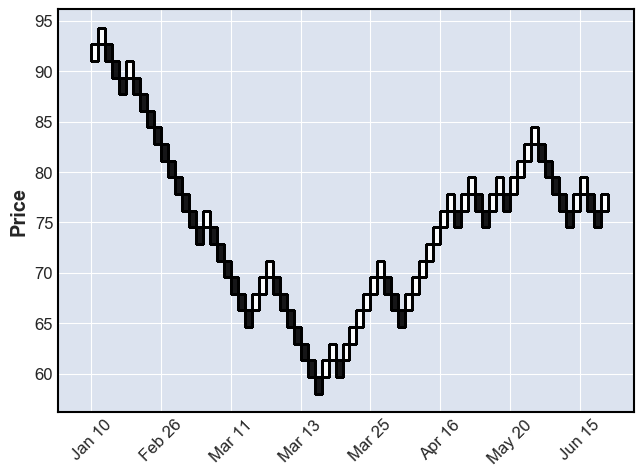

In [14]:
#Renko图
mpf.plot( new_sbux.iloc[:150],type='renko')

# 2.数据特征

## 2.1 正态分布检验

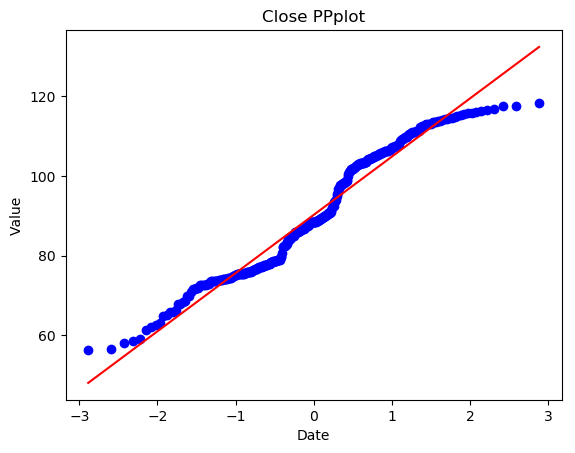

In [11]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
res = stats.probplot(sbux["Close"], plot=plt)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Close PPplot')
plt.grid()
plt.show()

# 2.2 平稳性检验

In [12]:
from statsmodels.tsa.stattools import adfuller   # ADF检验
 
for i in sbux.columns:
    data=sbux[i]
    print(f'{i}的单位根检验')
    result = adfuller(data)    #默认情况下，regression参数为'c'，表示使用包含截距项的回归模型。
    print('ADF Statistic: %f' % result[0])   #ADF统计量
    print('p-value: %f' % result[1])    #p值
    print('Critical Values:')     #在置信水平下的临界值
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    print()

High的单位根检验
ADF Statistic: -0.556131
p-value: 0.880590
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571

Low的单位根检验
ADF Statistic: -0.432442
p-value: 0.904540
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571

Open的单位根检验
ADF Statistic: -0.404232
p-value: 0.909390
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571

Close的单位根检验
ADF Statistic: -0.377458
p-value: 0.913795
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571

Volume的单位根检验
ADF Statistic: -3.510968
p-value: 0.007710
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571

Adj Close的单位根检验
ADF Statistic: -0.277305
p-value: 0.928658
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571



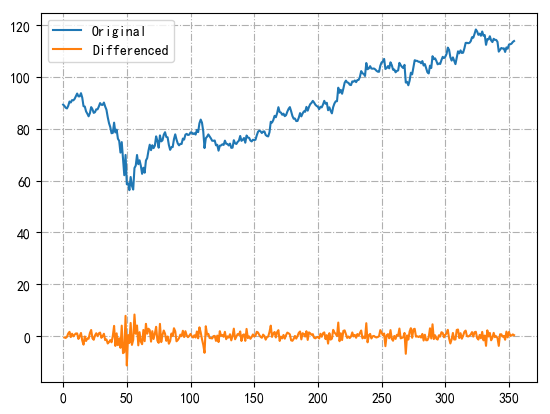

In [25]:
data = pd.read_excel("SBUX.xlsx")[['Close']]
diff_data = data.diff().dropna()
plt.figure()
plt.plot(data, label='Original')
plt.plot(diff_data, label='Differenced')
plt.legend()
data = diff_data

In [26]:
result = adfuller(data)
print('ADF Statistic: %f' % result[0])   #ADF统计量
print('p-value: %f' % result[1])    #p值

print("critical value 1%%: %f" % result[4]["1%"])
print("critical value 5%%: %f" % result[4]["5%"])
print("critical value 10%%: %f" % result[4]["10%"])

ADF Statistic: -7.171947
p-value: 0.000000
critical value 1%: -3.449337
critical value 5%: -2.869906
critical value 10%: -2.571227


# 2.3 归一化处理

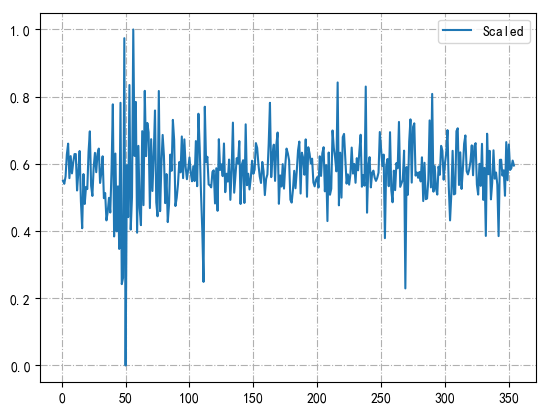

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index)
plt.figure()
plt.plot(scaled_data, label='Scaled')
plt.legend()
plt.show()

## 2.4 模型定阶（AIC准则）

In [30]:
aic_values = {}
for p in range(6):
    for q in range(6):
        try:
            model = ARIMA(scaled_data, order=(p, 1, q))
            result = model.fit()
            aic_values[(p, 1, q)] = result.aic
        except:
            continue

min_aic = min(aic_values, key=aic_values.get)
print("min aci:", min_aic)

min aci: (2, 1, 3)


## 2.5 自相关、偏自相关、残差图

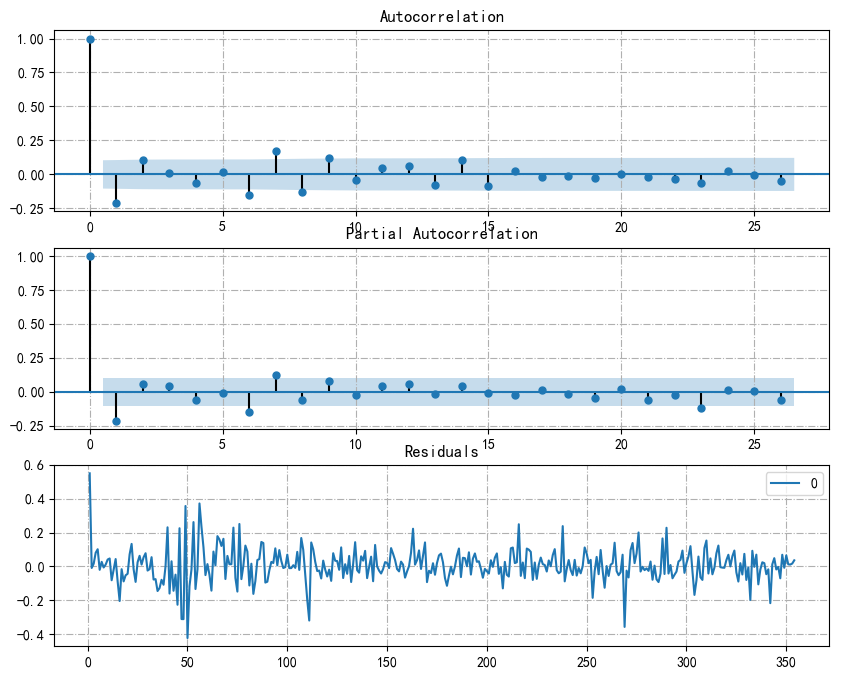

In [42]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
model = ARIMA(scaled_data, order=min_aic)
result = model.fit()
 
fig, axes = plt.subplots(3, 1, figsize=(10, 8))
plot_acf(scaled_data, ax=axes[0])
plot_pacf(scaled_data, ax=axes[1])
residuals = pd.DataFrame(result.resid)
residuals.plot(ax=axes[2])
plt.title('Residuals')
plt.show()

# 3.建模预测

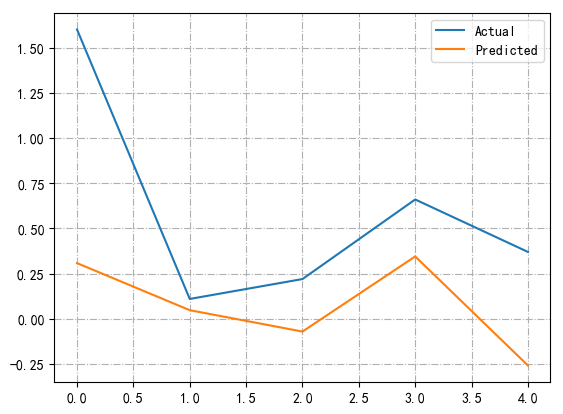

In [45]:
train_size = len(scaled_data)-5
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]
model = ARIMA(train_data, order=min_aic)
result = model.fit()
predictions = result.forecast(steps=len(test_data))
predictions = scaler.inverse_transform(predictions.values.reshape(-1, 1)).flatten()
actual = scaler.inverse_transform(test_data["Close"].values.reshape(-1, 1)).flatten()
 
plt.figure()
plt.plot(actual, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()    

In [40]:
from statsmodels.tsa.arima.model import ARIMA
data = sbux["Close"]
model = ARIMA(data, order=(2, 1, 3))
model_fit = model.fit()
# 预测
yhat = model_fit.predict(len(data), len(data))
yhat

355    113.724217
dtype: float64